<a href="https://colab.research.google.com/github/Romeuduarte/Forest-Fire-Brazil/blob/main/Forest-Fire-Brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Capstone - Forest Fires in Brazil**



Experts say that the blazes are almost exclusively due to human activity, and they attribute the uptick to the expansion of agriculture and a reduction of oversight and surveillance.
The National Institute of Space Research (INPE) has detected 106,000 fires destroying natural vegetation in 2017 – the highest number in a single month since records began in 1998, said Alberto Setzer, coordinator of INPE’s fire monitoring satellite program.
According to INPE, deforestation has risen continuously since 2012, when a new forest code that gave amnesty to deforesters was introduced

I will be using various Python libraries to conduct statistical analysis on a dataset tha contais the number of forest fire incidents in Brazil.

I am using a dataset found on Kaggle.com.
https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil

The dataset is CSV file with 5 Columns and 6455 rows. The data types are 2 Strings column, 1 DateTime column and 2 Integer column and I also add 2 new column in the dataset called Area(string) and Decade(string) divinding Brazil in North and South and First decade and Second decade respectively.

**I will be testing 2 hypothesis:**
- Hypothesis One: the first decade of forest fire incidents equal to the second decade of forest fire incidents
-  Hypothesis Two: forest fire incidents in North of Brazil  equal to forest fire incidents in South of Brazil

To start, let's import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import math
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#loading the file
df = pd.read_csv('/content/gdrive/My Drive/Final Project/amazon.csv', encoding='cp1252')

Now it's time to check it out the dataset:

In [ ]:
df.shape

(6454, 7)

In [ ]:
#analysing the data
df.head()

,year,state,month,number,date,Area,Decade
0,1998,Acre,Janeiro,0.0,1/1/1998,North,First Decade
1,1999,Acre,Janeiro,0.0,1/1/1999,North,First Decade
2,2000,Acre,Janeiro,0.0,1/1/2000,North,First Decade
3,2001,Acre,Janeiro,0.0,1/1/2001,North,First Decade
4,2002,Acre,Janeiro,0.0,1/1/2002,North,First Decade


Is the dataset has null values?

In [ ]:
#No null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
 5   Area    6454 non-null   object 
 6   Decade  6454 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 353.1+ KB


In [ ]:
df['number'].describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

# **Hypothesis One:** 

Is the first decade of forest fire incidents equal to the second decade of forest fire incidents?


- Mean of fire incidents reported in the first decade(1998 – 2008) = Mean of fire incidents reported in the second decade(2009-2018)


Now let's divide the year column in two sections: 
First decade (1998-2007)

In [ ]:
df_first_decade = df[df['year']<=2007] 

In [ ]:
df_first_decade['number'].describe()

count    3240.000000
mean       99.937849
std       188.521942
min         0.000000
25%         2.000000
50%        15.727000
75%        94.000000
max       995.000000
Name: number, dtype: float64

In [ ]:
df_first_decade.head()

,year,state,month,number,date,Area,Decade
0,1998,Acre,Janeiro,0.0,1/1/1998,North,First Decade
1,1999,Acre,Janeiro,0.0,1/1/1999,North,First Decade
2,2000,Acre,Janeiro,0.0,1/1/2000,North,First Decade
3,2001,Acre,Janeiro,0.0,1/1/2001,North,First Decade
4,2002,Acre,Janeiro,0.0,1/1/2002,North,First Decade


Let's plot the first decade with a bar chart to visualize

In [ ]:
visual_first_decade = df_first_decade.groupby(['year']).sum()

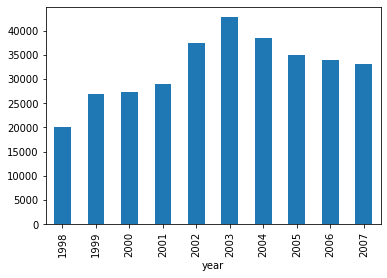

In [ ]:
visual_first_decade['number'].plot.bar()

Second section: Second decade (2008-2017)


In [ ]:
df_second_decade = df[df['year']>=2008]

In [ ]:
df_second_decade['number'].describe()

count    3214.000000
mean      116.716068
std       192.756576
min         0.000000
25%         4.355750
50%        34.500000
75%       128.750000
max       998.000000
Name: number, dtype: float64

In [ ]:
df_second_decade.head()

,year,state,month,number,date,Area,Decade
10,2008,Acre,Janeiro,0.0,1/1/2008,North,Second Decade
11,2009,Acre,Janeiro,0.0,1/1/2009,North,Second Decade
12,2010,Acre,Janeiro,1.0,1/1/2010,North,Second Decade
13,2011,Acre,Janeiro,0.0,1/1/2011,North,Second Decade
14,2012,Acre,Janeiro,0.0,1/1/2012,North,Second Decade


Let's plot the second decade with a bar chart to visualize

In [ ]:
visual_second_decade = df_second_decade.groupby(['year']).sum()

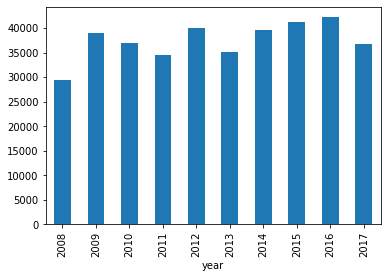

In [ ]:
visual_second_decade['number'].plot.bar()

Now comparing between both decades

Here I add the column "Decade"(string) to my dataset comparing first and second decade. 

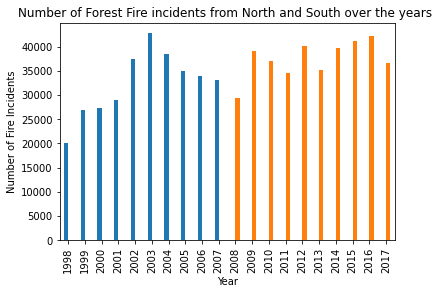

In [ ]:
df.groupby(['year','Decade']).sum().unstack().plot.bar()
plt.title('Number of Forest Fire incidents from North and South over the years ')
plt.xlabel('Year')
plt.ylabel('Number of Fire Incidents')
plt.legend().remove()

Some years from the first decade is high as the second decade. I wonder if they're statistically different. 

Let's check:

##Hyphotesis Testing:

Perform t-test 

I want to examine whether there is a significant difference in the forest fire in Brazil from 1998-2007 and 2008-2017. So, my hypotheses are thus:

H₀: μ₁ - μ₂ = 0  
Hₐ: μ₁ - μ₂ ≠ 0

In [ ]:
#T-test to evaluate the statistical difference 
stats.ttest_ind(df_first_decade['number'] , df_second_decade['number']) 

Ttest_indResult(statistic=-3.5351441171165483, pvalue=0.0004104108746177664)

With the P-value at 0.0004 , I will reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist.

In [ ]:
#Confidence level
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df_first_decade['number'],df_second_decade['number'])

'The difference in means at the 95% confidence interval (two-tail) is between 7.474990761312911 and 26.081446747041724.'

Based on these results I would reject my null hypothesis and accept that the forest fire in Brazil between 1998-2007 and 2008-2017 is statistically significant.

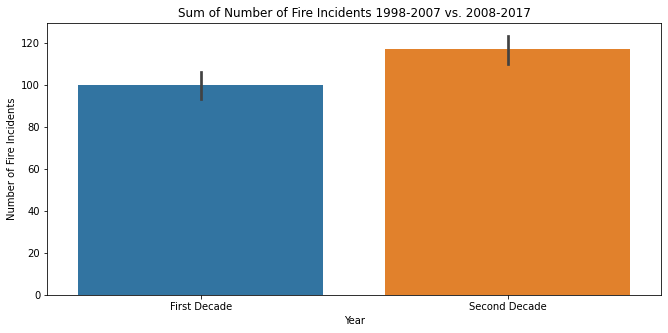

In [ ]:
decade_test= pd.concat([df_first_decade, df_second_decade])

plt.figure(figsize = (11,5))
sns.barplot(x="Decade", y="number", data=decade_test)
plt.xlabel('Year')
plt.ylabel('Number of Fire Incidents')
plt.title('Sum of Number of Fire Incidents 1998-2007 vs. 2008-2017');

# **Hypothesis Two:**

Are forest fire incidents in North of Brazil equal to forest fire incidents in South of Brazil?


- Mean of fire incidents reported in the  North of Brazil = Mean of fire incidents reported in the South of Brazil.

Now I created on the original dataset a new column called "Area" diving the country in two parts("North" and "South"). Based on states from the North and South of Brazil.

After that  let's divide the Area column in two sections 

###First section: North (all north states of Brazil)

In [ ]:
#Which area has the most forest fire incidentes? 
North_of_Brazil = df[df['Area'] == 'North'] 

In [ ]:
North_of_Brazil['number'].describe()

count    3586.000000
mean       98.162891
std       187.705622
min         0.000000
25%         2.188250
50%        15.000000
75%        90.000000
max       998.000000
Name: number, dtype: float64

In [ ]:
North_of_Brazil.head

<bound method NDFrame.head of       year      state     month  number      date   Area         Decade
0     1998       Acre   Janeiro     0.0  1/1/1998  North   First Decade
1     1999       Acre   Janeiro     0.0  1/1/1999  North   First Decade
2     2000       Acre   Janeiro     0.0  1/1/2000  North   First Decade
3     2001       Acre   Janeiro     0.0  1/1/2001  North   First Decade
4     2002       Acre   Janeiro     0.0  1/1/2002  North   First Decade
...    ...        ...       ...     ...       ...    ...            ...
6449  2012  Tocantins  Dezembro   128.0  1/1/2012  North  Second Decade
6450  2013  Tocantins  Dezembro    85.0  1/1/2013  North  Second Decade
6451  2014  Tocantins  Dezembro   223.0  1/1/2014  North  Second Decade
6452  2015  Tocantins  Dezembro   373.0  1/1/2015  North  Second Decade
6453  2016  Tocantins  Dezembro   119.0  1/1/2016  North  Second Decade

[3586 rows x 7 columns]>

Now let's see the graph from the North:

Text(0, 0.5, 'Number of Fire Incidents')

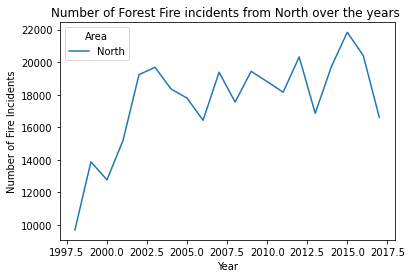

In [ ]:
North_of_Brazil.groupby(['year','Area']).sum().unstack().plot(kind='line',y='number')
plt.title('Number of Forest Fire incidents from North over the years ')
plt.xlabel('Year')
plt.ylabel('Number of Fire Incidents')

###Second section : South(all south states from Brazil)

In [ ]:
South_of_Brazil = df[df['Area'] == 'South'] 

In [ ]:
South_of_Brazil['number'].describe()

count    2868.000000
mean      120.959535
std       193.916378
min         0.000000
25%         5.408250
50%        39.000000
75%       137.000000
max       995.000000
Name: number, dtype: float64

In [ ]:
South_of_Brazil.head

<bound method NDFrame.head of       year      state     month  number      date   Area         Decade
957   1998      Bahia   Janeiro     0.0  1/1/1998  South   First Decade
958   1999      Bahia   Janeiro   114.0  1/1/1999  South   First Decade
959   2000      Bahia   Janeiro    31.0  1/1/2000  South   First Decade
960   2001      Bahia   Janeiro    24.0  1/1/2001  South   First Decade
961   2002      Bahia   Janeiro   125.0  1/1/2002  South   First Decade
...    ...        ...       ...     ...       ...    ...            ...
5971  2012  Sao Paulo  Dezembro    64.0  1/1/2012  South  Second Decade
5972  2013  Sao Paulo  Dezembro   109.0  1/1/2013  South  Second Decade
5973  2014  Sao Paulo  Dezembro    57.0  1/1/2014  South  Second Decade
5974  2015  Sao Paulo  Dezembro    45.0  1/1/2015  South  Second Decade
5975  2016  Sao Paulo  Dezembro    47.0  1/1/2016  South  Second Decade

[2868 rows x 7 columns]>

And now the graph from the South:

Text(0, 0.5, 'Number of Fire Incidents')

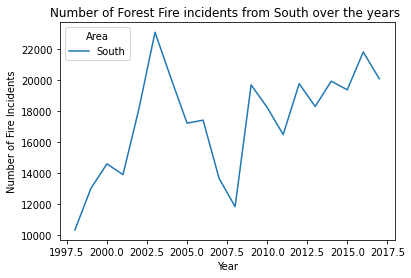

In [ ]:
South_of_Brazil.groupby(['year','Area']).sum().unstack().plot(kind='line',y='number')
plt.title('Number of Forest Fire incidents from South over the years ')
plt.xlabel('Year')
plt.ylabel('Number of Fire Incidents')

Let's plot a line chart over the years comparing the North and South of Brazil

In [ ]:
df['year'] = df['year'].astype(str)

Text(0, 0.5, 'Number of Fire Incidents')

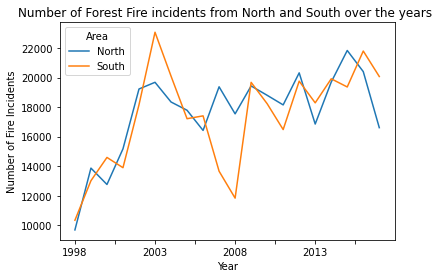

In [ ]:
df.groupby(['year','Area']).sum().unstack().plot(kind='line',y='number')
plt.title('Number of Forest Fire incidents from North and South over the years ')
plt.xlabel('Year')
plt.ylabel('Number of Fire Incidents')

##Hyphotesis Testing:

Perform t-test

I want to examine whether there is a significant difference in the forest fire in Brazil between North and South of the country. So, my hypotheses are thus:

H₀: μ₁ - μ₂ = 0

Hₐ: μ₁ - μ₂ ≠ 0

In [ ]:
stats.ttest_ind(North_of_Brazil['number'] , South_of_Brazil['number']) 

Ttest_indResult(statistic=-4.777250523229817, pvalue=1.8163782247079013e-06)

With the P-value at 1.81e-06 , I will reject the null hypothesis that theres no difference between the means and concluede that a significant difference does exist.

In [ ]:
#Confidence level
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(North_of_Brazil['number'],South_of_Brazil['number'])

'The difference in means at the 95% confidence interval (two-tail) is between 13.409761064273813 and 32.18352799608088.'

Let's sort the number of forest fire incidents by the state:

In [ ]:
df_by_state = df.groupby(['state']).sum()

Text(0, 0.5, 'Number of Fire Incidents')

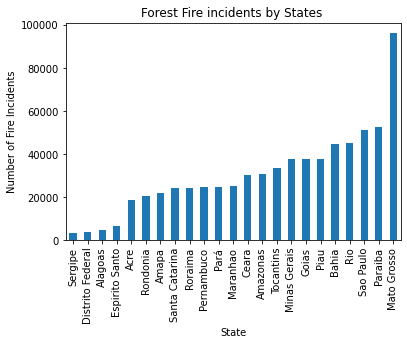

In [ ]:
df_by_state['number'].sort_values().plot.bar()
plt.title('Forest Fire incidents by States ')
plt.xlabel('State')
plt.ylabel('Number of Fire Incidents')

In [ ]:
Both_areas = df.groupby(['Area']).sum()

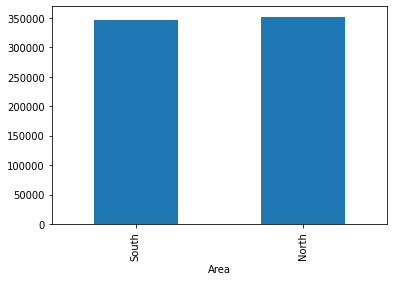

In [ ]:
Both_areas['number'].sort_values().plot.bar()

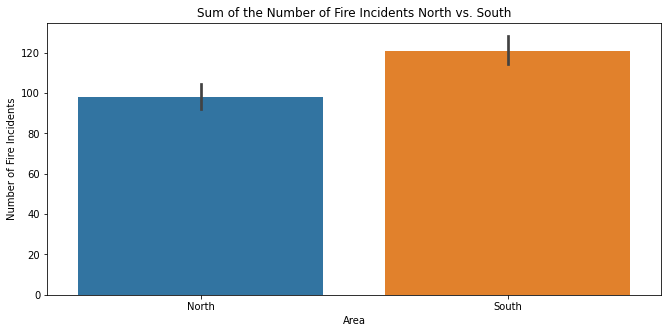

In [ ]:
Area_test= pd.concat([North_of_Brazil, South_of_Brazil])

plt.figure(figsize = (11,5))
sns.barplot(x="Area", y="number", data=Area_test)
plt.xlabel('Area')
plt.ylabel('Number of Fire Incidents')
plt.title('Sum of the Number of Fire Incidents North vs. South');decade_test= pd.concat([df_first_decade, df_second_decade])


#**Conclusion**

- In my first analysis I rejected the null hypothesis. Over decades the forest fire incidents is increasing.
- In the second analysis I will reject the null hypothesis that there's no difference between the means and conclude that a significant difference does exist.



### Recommendations:


1) I recommend that SNIF and SINIMA provide  focus their resource allocation on Mato Gross to prevent future forest firest and encourage forest conservation since Mato Grosso has a signficantly higher rate of fires than any other state.

2) I recommend SNIF and SINIMIA increase oversight and surveillance of agriculture to reduce increasing rate of forest fires.

3) I recommend that SNIF and SINIMIA allocate resources on educating people to prevent fires as the rate of fires is increasing over time.